## 优化问题的步骤和数学公式

### 目标

第二题的优化目标是最大化净收入，同时考虑到超出预期销售量的部分会按2023年销售价格的50%折扣价出售，因此需要最大化折扣后的收益。这意味着我们在给定的地块上选择合适的作物种植方案，以满足各种约束条件，同时实现收益的最优化。

### 决策变量

定义决策变量 $x_{i,j,y}$，表示在地块 $i$ 上种植作物 $j$ 在年份 $y$ 的种植面积（单位：亩）。

### 目标函数

优化问题的目标函数可以表示为：

$$
\text{Maximize:} \quad Z = \sum_{i} \sum_{j} \sum_{y} \left( (P_j^y \cdot Y_j^y - C_j^y) \cdot x_{i,j,y} + D_j^y \cdot \max(0, Y_j^y \cdot x_{i,j,y} - S_j^y) \right)
$$

其中：

- $Z$ 表示总净收益，即我们希望最大化的目标值。
- $P_j^y$ 表示作物 $j$ 在年份 $y$ 的销售单价（单位：元/斤），不同种类作物的售价随时间变化。
- $Y_j^y$ 表示作物 $j$ 在年份 $y$ 的亩产量（单位：斤/亩），由于气候等因素影响，每年可能会变化。
- $x_{i,j,y}$ 表示在地块 $i$ 上种植作物 $j$ 在年份 $y$ 的种植面积（单位：亩）。
- $C_j^y$ 表示作物 $j$ 在年份 $y$ 的种植成本（单位：元/亩），种植成本每年增长约5%。
- $D_j^y$ 表示作物 $j$ 超出预期销售量后的折扣价格（单位：元/斤），按2023年价格的50%计算。
- $S_j^y$ 表示作物 $j$ 在年份 $y$ 的预期销售量（单位：斤），不同作物的预期销售量根据作物类别随时间变化。

目标函数的第一部分 $(P_j^y \cdot Y_j^y - C_j^y) \cdot x_{i,j,y}$ 表示在每块地上每种作物的净收益，第二部分 $D_j^y \cdot \max(0, Y_j^y \cdot x_{i,j,y} - S_j^y)$ 表示超出预期销售量的作物的折扣收入。

### 参数不确定性

1. **销售量变化**：
   - 对于小麦和玉米，未来的预期销售量有增长的趋势，平均年增长率介于 $5\% \sim 10\%$ 之间：
   $$
   S_j^y = S_j^{2023} \cdot (1 + r)^{y - 2023}, \quad r \in [0.05, 0.10]
   $$
   - 其他农作物未来每年的预期销售量相对于 2023 年大约有 $\pm 5\%$ 的变化：
   $$
   S_j^y = S_j^{2023} \cdot (1 + r)^{y - 2023}, \quad r \in [-0.05, 0.05]
   $$

2. **亩产量变化**：
   - 农作物的亩产量 $Y_j^y$ 受气候等因素影响，每年会有 $\pm 10\%$ 的变化：
   $$
   Y_j^y = Y_j^{2023} \cdot (1 + \epsilon), \quad \epsilon \in [-0.10, 0.10]
   $$

3. **种植成本变化**：
   - 因受市场条件影响，农作物的种植成本 $C_j^y$ 平均每年增长5%：
   $$
   C_j^y = C_j^{2023} \cdot (1 + 0.05)^{y - 2023}
   $$

4. **销售价格变化**：
   - 粮食类作物的销售价格 $P_j^y$ 基本稳定：
   $$
   P_j^y = P_j^{2023}
   $$
   - 蔬菜类作物的销售价格有增长的趋势，平均每年增长5%左右：
   $$
   P_j^y = P_j^{2023} \cdot (1 + 0.05)^{y - 2023}
   $$
   - 食用菌的销售价格稳中有降，大约每年可下降 $1\% \sim 5\%$，特别是羊肚菌的销售价格每年下降幅度为5%：
   $$
   P_j^y = P_j^{2023} \cdot (1 - \delta)^{y - 2023}, \quad \delta \in [0.01, 0.05]
   $$

### 约束条件

1. **地块面积约束**：每个地块的种植面积不能超过其总面积。

$$
\sum_{j} x_{i,j,y} \leq A_i, \quad \forall i, y
$$

其中：

- $A_i$ 表示地块 $i$ 的总面积（单位：亩），即该地块可用于种植的最大面积。

2. **最小种植面积约束**：非零种植面积不能小于某个最小面积。

$$
x_{i,j,y} \geq M \cdot \text{I}(x_{i,j,y} > 0), \quad \forall i, j, y
$$

其中：

- $M$ 表示最小种植面积（单位：亩），如 10% 的地块面积。
- $\text{I}(x_{i,j,y} > 0)$ 是指示函数，当 $x_{i,j,y} > 0$ 时，值为 1，否则为 0。

3. **三年内至少种植一次豆类作物**：在每个地块上，三年内至少种植一次豆类作物。

$$
\sum_{y=y_0}^{y_0+2} \sum_{j \in \text{Beans}} x_{i,j,y} \geq 1, \quad \forall i
$$

其中：

- $\text{Beans}$ 表示豆类作物的集合。

4. **销量约束**：若作物 $j$ 的产量超过预期销售量，则超过部分会按折扣价格出售。

$$
Y_j^y \cdot x_{i,j,y} \leq S_j^y + E_j^y, \quad \forall i, j, y
$$

其中：

- $E_j^y$ 表示超出预期销售量的部分（单位：斤）。

### 优化方法

采用线性规划方法，通过 `scipy.optimize.linprog` 函数求解问题。目标函数的系数、约束矩阵和约束条件都将被转化为优化模型中的输入参数。

### 求解流程

1. **构建目标函数**：
   - 对于每种作物 $j$ 在每个地块 $i$ 在每年 $y$ 的种植方案，我们需要计算其可能的净收入和折扣后的收益，目标函数的表达式如下：
     $$
     Z = \sum_{i} \sum_{j} \sum_{y} \left( (P_j^y \cdot Y_j^y - C_j^y) \cdot x_{i,j,y} + D_j^y \cdot \max(0, Y_j^y \cdot x_{i,j,y} - S_j^y) \right)
     $$
   
   - 首先，计算每种作物的净收入部分 $(P_j^y \cdot Y_j^y - C_j^y) \cdot x_{i,j,y}$。这个部分考虑了作物的售价 $P_j^y$、亩产量 $Y_j^y$ 和种植成本 $C_j^y$。这些参数随年份 $y$ 变化，基于历史数据和市场预测进行更新。
   
   - 然后，计算作物超出预期销售量的部分 $D_j^y \cdot \max(0, Y_j^y \cdot x_{i,j,y} - S_j^y)$，其中 $D_j^y$ 是折扣后的价格。这个部分需要根据预测的销售量 $S_j^y$ 和实际产量来确定。
   
   - 目标函数的系数为每个作物的净收益和折扣收益之和，这些系数将用作 `linprog` 函数的输入参数 `c`。

2. **建立约束条件**：
   - **地块面积约束**：确保每个地块 $i$ 的所有作物种植面积之和不能超过该地块的总面积 $A_i$。数学表达式为：
     $$
     \sum_{j} x_{i,j,y} \leq A_i, \quad \forall i, y
     $$
     这一约束条件保证了在每个地块上分配的作物面积不超过可用的最大面积。它将作为不等式约束添加到优化问题中。
   
   - **最小种植面积约束**：确保每种作物在每个地块的种植面积要么为0，要么大于最小种植面积 $M$。其数学表达式为：
     $$
     x_{i,j,y} \geq M \cdot \text{I}(x_{i,j,y} > 0), \quad \forall i, j, y
     $$
     这里，$M$ 是最小种植面积（如地块面积的10%），该约束确保了作物种植的合理性和效率。
   
   - **三年内至少种植一次豆类作物的约束**：每个地块 $i$ 在三年内必须至少种植一次豆类作物，数学表达式如下：
     $$
     \sum_{y=y_0}^{y_0+2} \sum_{j \in \text{Beans}} x_{i,j,y} \geq 1, \quad \forall i
     $$
     这一约束条件能够保证农业轮作和土壤肥力的维护，作为线性不等式添加到模型中。
   
   - **销量约束**：需确保作物 $j$ 的实际种植产量不超过预期销售量 $S_j^y$。其数学表达式为：
     $$
     Y_j^y \cdot x_{i,j,y} \leq S_j^y + E_j^y, \quad \forall i, j, y
     $$
     这一约束条件用于控制作物产量避免市场过剩，$E_j^y$ 表示可折扣出售的部分。

   - 以上约束条件将作为 `linprog` 函数的输入参数 `A_ub` 和 `b_ub`，分别表示不等式约束矩阵和约束右侧的向量。

3. **求解优化问题**：
   - 使用 `scipy.optimize.linprog` 函数进行求解，输入构建好的目标函数系数和约束条件。该函数支持多种求解方法，如 "highs"，可以有效处理大型线性规划问题。
   - 在代码实现中，`linprog` 的调用格式如下：
     ```python
     result = linprog(c=objective_coeffs, A_ub=A_ub, b_ub=b_ub, method='highs')
     ```
     其中，`objective_coeffs` 是目标函数的系数，`A_ub` 和 `b_ub` 分别是不等式约束的矩阵和向量，`method='highs'` 是一种求解器选项，提供高效的求解性能。
   
   - 如果优化求解成功 (`result.success` 为 `True`)，可以从 `result.x` 中提取每个地块的最佳种植面积决策变量；否则，需要根据提示的信息进行调试或调整模型参数和约束条件。

4. **输出结果**：
   - 根据优化求解的结果，计算每个地块在每个年份和每个种植季节的作物种植面积。将结果保存在一个表格（如 `DataFrame`）中，结构包括“年”、“季别”、“地块名”和各个作物的种植面积。
   - 最后，将结果输出到 Excel 文件中，以便后续分析和决策。代码实现如下：
     ```python
     final_results.to_excel('2024至2030年农作物种植方案Q2.xlsx', index=None)
     ```
   - 这些输出结果将为农业生产管理提供一个明确的种植方案，使得农民和管理者能够最大化利用资源，降低生产风险，并优化收益。

In [1]:
import pulp
import pandas as pd
import numpy as np
from scipy.optimize import linprog
import random

RANDOM_SEED = 77
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# 读取四个表格的数据文件路径
planting_data_file = './2023年的种植数据与销售量.xlsx'
crop_sales_file = './各作物聚合后销售量与价格.xlsx'
crop_land_file = './各作物适合种植的地块类型与季别.xlsx'
land_info_file = './乡村的现有耕地.xlsx'


In [2]:
planting_data = pd.read_excel(planting_data_file)
crop_sales_data = pd.read_excel(crop_sales_file)
crop_land_data = pd.read_excel(crop_land_file)
land_info_data = pd.read_excel(land_info_file)

# 定义随机生成函数
def random_range(value, percent):
    return value * (1 + np.random.uniform(-percent, percent))

# 生成销售量、亩产量、种植成本和销售价格的随机值
def generate_random_parameters(crop_name, year, crop_type):
    # 获取2023年的数据
    yield_data = planting_data[(planting_data['作物名称_x'] == crop_name)]['亩产量/斤'].values[0]
    price_data = crop_sales_data[crop_sales_data['作物名称'] == crop_name]['销售单价/(元/斤)'].values[0]
    cost_data = planting_data[(planting_data['作物名称_x'] == crop_name)]['种植成本/(元/亩)'].values[0]
    sales_volume_2023 = crop_sales_data[crop_sales_data['作物名称'] == crop_name]['销售量/斤'].values[0]

    # 计算未来年份的销售量、亩产量、种植成本和销售价格
    if crop_type == '粮食':
        sales_volume = sales_volume_2023 * (1 + np.random.uniform(0.05, 0.1)) ** (year - 2023)
    else:
        sales_volume = sales_volume_2023 * (1 + np.random.uniform(-0.05, 0.05)) ** (year - 2023)

    yield_per_acre = random_range(yield_data, 0.1)
    cost_per_acre = cost_data * (1 + 0.05) ** (year - 2023)
    
    if crop_type == '粮食':
        price_per_unit = price_data
    elif crop_type == '蔬菜':
        price_per_unit = price_data * (1 + 0.05) ** (year - 2023)
    else:
        price_decrease = 0.01 * np.random.uniform(1, 5) if crop_name != '羊肚菌' else 0.05
        price_per_unit = price_data * (1 - price_decrease) ** (year - 2023)
    
    return sales_volume, yield_per_acre, cost_per_acre, price_per_unit


In [3]:
# 根据 crop_land_data 筛选适合第一季和第二季的作物
def get_suitable_crops(season):
    if season == '第一季':
        suitable_crops = crop_land_data[crop_land_data[f'水浇地{season}'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'普通大棚{season}'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'智慧大棚{season}'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'平旱地'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'梯田'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'山坡地'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'水浇地'] == 1]['作物名称'].tolist()
    else:
        suitable_crops = crop_land_data[crop_land_data[f'水浇地{season}'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'普通大棚{season}'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'智慧大棚{season}'] == 1]['作物名称'].tolist()
    
    return suitable_crops

suitable_crops_first_season = get_suitable_crops('第一季')
suitable_crops_second_season = get_suitable_crops('第二季')

# 过滤不在 suitable_crops 中的作物
crops_first_season = [crop for crop in planting_data['作物名称_x'].unique() if crop in suitable_crops_first_season]
crops_second_season = [crop for crop in planting_data['作物名称_x'].unique() if crop in suitable_crops_second_season]

# 提取地块和作物信息
land_types = land_info_data['地块名称'].unique().tolist()

# 第二季地块
land_types_second_season = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 
                            'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 
                            'F1', 'F2', 'F3', 'F4']

# 随机选择作物的数量, 减少计算量
num_crops_to_select = 9

In [4]:
# 为第一季和第二季创建地块与作物的映射
def create_land_crop_mapping(land_types, crops):
    land_crop_mapping = {}
    for land in land_types:
        if len(crops) > num_crops_to_select:
            selected_crops = random.sample(crops, num_crops_to_select)
        else:
            selected_crops = crops  # 如果作物少于9种，全部选中
        land_crop_mapping[land] = selected_crops
    return land_crop_mapping

# 第一季
land_crop_mapping_first_season = create_land_crop_mapping(land_types, crops_first_season)

# 第二季
land_crop_mapping_second_season = create_land_crop_mapping(land_types_second_season, crops_second_season)



In [5]:
# 定义目标函数和约束条件
def optimize_land_crop(land_crop_mapping, crops, season, year):
    # 初始化决策变量和目标函数
    decision_vars = {}
    objective_coeffs = []
    A_ub = []
    b_ub = []

    for land, selected_crops in land_crop_mapping.items():
        for crop in selected_crops:
            decision_vars[(crop, land)] = 0

            # 获取当前作物的参数
            crop_type = crop_land_data[crop_land_data['作物名称'] == crop]['作物类型'].values[0]
            sales_volume, yield_per_acre, cost_per_acre, price_per_unit = generate_random_parameters(crop, year, crop_type)
            
            # 计算超产部分按50%降价的销售收入
            sales_volume_2023 = crop_sales_data[crop_sales_data['作物名称'] == crop]['销售量/斤'].values[0]
            excess_volume = sales_volume - sales_volume_2023
            if excess_volume > 0:
                discounted_price = 0.5 * crop_sales_data[crop_sales_data['作物名称'] == crop]['销售单价/(元/斤)'].values[0]
                net_revenue = (sales_volume_2023 * price_per_unit - cost_per_acre) + (excess_volume * discounted_price - cost_per_acre)
            else:
                net_revenue = sales_volume * price_per_unit - cost_per_acre

            objective_coeffs.append(-net_revenue)  # 目标函数是最大化净利润

    objective_coeffs = np.array(objective_coeffs)
    
    # 约束条件1：总面积约束
    # 每个地块的种植面积不能超过其总面积
    for land in land_crop_mapping.keys():
        constraint = np.zeros(len(decision_vars))
        for i, (crop, land_name) in enumerate(decision_vars.keys()):
            if land_name == land:
                constraint[i] = 1
        A_ub.append(constraint)
        b_ub.append(land_info_data[land_info_data['地块名称'] == land]['地块面积/亩'].values[0])
    
    # 约束条件2：最小种植面积约束
    # 每个地块的每种作物的种植面积不能小于其地块面积的10%
    for land in land_crop_mapping.keys():
        min_area = 0.1 * land_info_data[land_info_data['地块名称'] == land]['地块面积/亩'].values[0]
        for crop in land_crop_mapping[land]:
            constraint = np.zeros(len(decision_vars))
            for i, (crop_name, land_name) in enumerate(decision_vars.keys()):
                if crop_name == crop and land_name == land:
                    constraint[i] = -1
            A_ub.append(constraint)
            b_ub.append(-min_area)
    
    # 约束条件3：三年内至少种植一次豆类作物
    # 确保每个地块至少种植一次豆类作物
    beans_crops = crop_land_data[crop_land_data['作物类型'].str.contains('粮食（豆类）')]['作物名称'].tolist()
    for land in land_crop_mapping.keys():
        constraint = np.zeros(len(decision_vars))
        for i, (crop, land_name) in enumerate(decision_vars.keys()):
            if land_name == land and crop in beans_crops:
                constraint[i] = -1
        A_ub.append(constraint)
        b_ub.append(0)
    
    # 约束条件4：销量约束
    # 限制每种作物的种植面积，以确保其总产量不超过预期销售量
    apply_sales_constraint = False
    if apply_sales_constraint:
        for crop in crops:
            total_yield = sum([
                decision_vars[(crop, land)] * planting_data[
                    (planting_data['作物名称_x'] == crop) & 
                    (planting_data['地块类型'] == land_info_data[land_info_data['地块名称'] == land]['地块类型'].values[0])
                ]['亩产量/斤'].values[0]
                for land in land_crop_mapping.keys() if (crop, land) in decision_vars
            ])
            constraint = np.zeros(len(decision_vars))
            for i, (crop_name, land_name) in enumerate(decision_vars.keys()):
                if crop_name == crop:
                    constraint[i] = 1
            A_ub.append(constraint)
            b_ub.append(crop_sales_data[crop_sales_data['作物名称'] == crop]['销售量/斤'].values[0])  # 销量约束

    A_ub = np.array(A_ub)
    b_ub = np.array(b_ub)

    # 优化模型
    result = linprog(c=objective_coeffs, A_ub=A_ub, b_ub=b_ub, method='highs')

    # 构建优化结果的表格输出
    if result.success:
        optimal_areas = result.x
        solution = {}
        
        for i, (crop, land) in enumerate(decision_vars.keys()):
            if land not in solution:
                solution[land] = {}
            solution[land][crop] = optimal_areas[i]
        
        all_crops = sorted(set(crop_sales_data['作物名称'].to_list()))
        
        results = pd.DataFrame(columns=['年', '季别', '地块名'] + all_crops)
        
        for land, crop_areas in solution.items():
            season_data = {'年': year, '季别': season, '地块名': land}
            for crop in all_crops:
                season_data[crop] = crop_areas.get(crop, 0)
            
            results = results._append(season_data, ignore_index=True)

        return results
    else:
        print(f"{year}年{season}优化失败，无法生成结果表格。")
        return None



In [6]:
# 迭代计算 2024~2030 年的结果
years = list(range(2024, 2031))
all_results = []

for year in years:
    results_first_season = optimize_land_crop(land_crop_mapping_first_season, crops_first_season, '第一季', year)
    results_second_season = optimize_land_crop(land_crop_mapping_second_season, crops_second_season, '第二季', year)

    if results_first_season is not None and results_second_season is not None:
        combined_results = pd.concat([results_first_season, results_second_season], ignore_index=True)
        all_results.append(combined_results)

# 将所有结果写入Excel文件
if all_results:
    final_results = pd.concat(all_results, ignore_index=True)
    final_results.to_excel('2024至2030年农作物种植方案Q2.xlsx', index=None)

In [7]:
final_results

,年,季别,地块名,刀豆,包菜,南瓜,土豆,大白菜,大麦,小青菜,...,豇豆,辣椒,青椒,香菇,高粱,黄心菜,黄瓜,黄豆,黍子,黑豆
0,2024,第一季,A1,8.00,0,0,8.0,0,0,16.00,...,0,0,0,0,0,0,0,0,8.0,0
1,2024,第一季,A2,0.00,0,0,5.5,0,0,0.00,...,0,0,0,0,5.5,0,5.5,0,5.5,5.5
2,2024,第一季,A3,0.00,3.5,0,0.0,0,0,0.00,...,0,0,0,0,0,0,0,3.5,0.0,3.5
3,2024,第一季,A4,0.00,0,7.2,0.0,0,0,14.40,...,0,7.2,7.2,0,0,7.2,0,7.2,0.0,0
4,2024,第一季,A5,0.00,0,0,0.0,0,0,0.00,...,0,6.8,6.8,0,0,0,6.8,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2030,第二季,E16,0.06,0.06,0,0,0,0,0.00,...,0.0,0.0,0,0.0,0,0.06,0.06,0,0,0
570,2030,第二季,F1,0.12,0.06,0,0.06,0,0,0.00,...,0.0,0.0,0,0.06,0,0.06,0.06,0,0,0
571,2030,第二季,F2,0.06,0.06,0,0.06,0,0,0.12,...,0.0,0.06,0,0.0,0,0.0,0,0,0,0
572,2030,第二季,F3,0.12,0.06,0,0.06,0,0,0.00,...,0.0,0.0,0.06,0.0,0,0.06,0,0,0,0


In [8]:

import pandas as pd

# 定义新的列名
new_columns = [
    '季别', '地块名', '黄豆', '黑豆', '红豆', '绿豆', '爬豆', '小麦', '玉米', '谷子', '高粱', '黍子', '荞麦', '南瓜',
    '红薯', '莜麦', '大麦', '水稻', '豇豆', '刀豆', '芸豆', '土豆', '西红柿', '茄子', '菠菜', '青椒', '菜花', '包菜',
    '油麦菜', '小青菜', '黄瓜', '生菜', '辣椒', '空心菜', '黄心菜', '芹菜', '大白菜', '白萝卜', '红萝卜', '榆黄菇',
    '香菇', '白灵菇', '羊肚菌'
]

# 创建一个 Pandas Excel writer 对象
with pd.ExcelWriter('2024至2030年农作物种植方案Q2.xlsx', engine='xlsxwriter') as writer:
    for year in range(2024, 2031):
        year_data = final_results[final_results['年'] == year]
        year_data = year_data.drop(columns=['年'])
       
        year_data = year_data.rename(columns=lambda x: x if x in new_columns else x)
        year_data = year_data.reindex(columns=new_columns, fill_value=0)
        year_data.to_excel(writer, sheet_name=str(year), index=False)

<Figure size 1200x800 with 0 Axes>

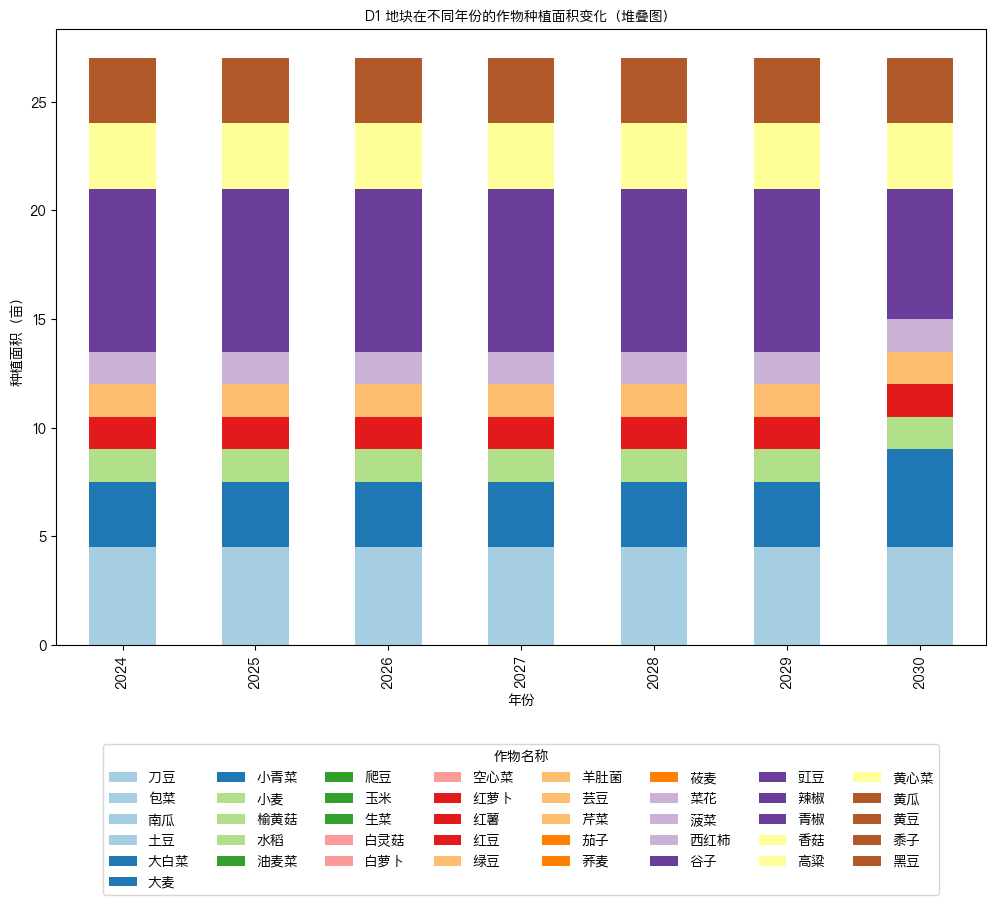

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

font_path = '/System/Library/Fonts/PingFang.ttc'
my_font = FontProperties(fname=font_path)

file_path = '2024至2030年农作物种植方案Q2.xlsx'
excel_data = pd.ExcelFile(file_path)

# 地块的种植作物种类变化（堆叠柱状图）
# 选择一个地块（例如：D1）来展示不同年份的作物种类变化
plot_data = []
selected_land = 'D1'

for year in range(2024, 2031):
    year_data = pd.read_excel(excel_data, sheet_name=str(year))
    land_data = year_data[year_data['地块名'] == selected_land].set_index('季别').sum(axis=0).reset_index()
    land_data.columns = ['作物', '种植面积']
    land_data['年份'] = year
    plot_data.append(land_data)

plot_data = pd.concat(plot_data)

plot_data_pivot = plot_data.pivot(index='年份', columns='作物', values='种植面积').fillna(0)

plt.figure(figsize=(12, 8))

plot_data_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Paired')
plt.title(f'{selected_land} 地块在不同年份的作物种植面积变化（堆叠图）', fontproperties=my_font)
plt.xlabel('年份', fontproperties=my_font)
plt.ylabel('种植面积（亩）', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)

plt.legend(
    title='作物名称', 
    title_fontproperties=my_font,
    prop=my_font,
    bbox_to_anchor=(0.5, -0.15), 
    loc='upper center',
    ncol=8 
)

plt.show()



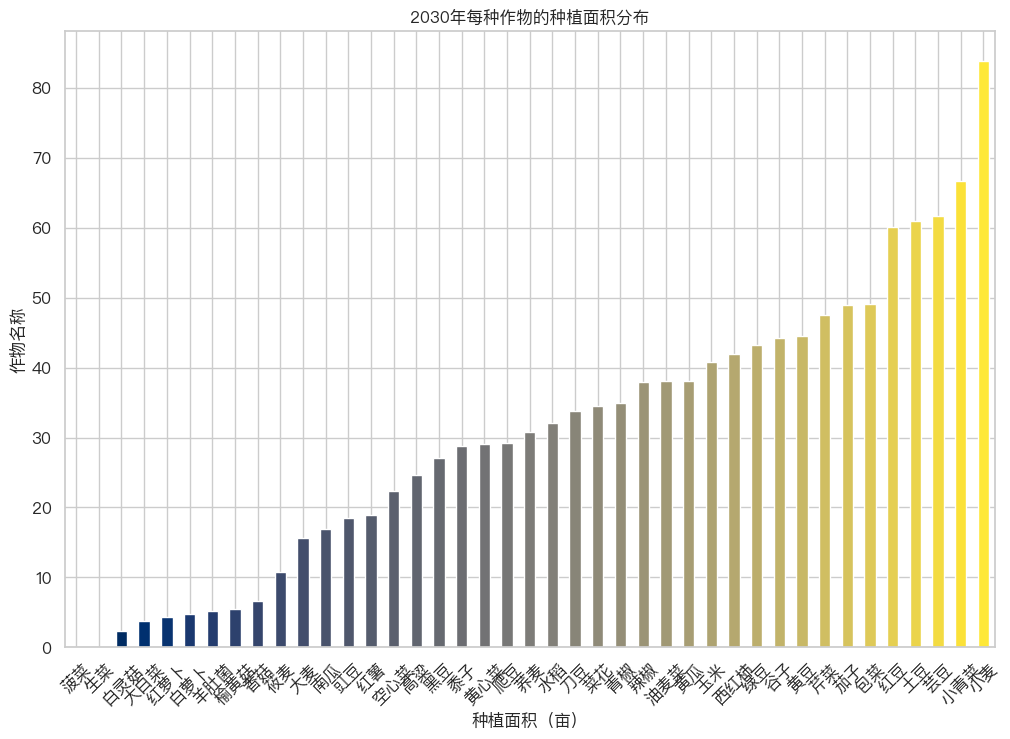

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 设置字体
font_path = '/System/Library/Fonts/PingFang.ttc'
my_font = FontProperties(fname=font_path)

# 读取生成的 Excel 文件
file_path = '2024至2030年农作物种植方案Q2.xlsx'
excel_data = pd.ExcelFile(file_path)

# 设置绘图风格
sns.set(style='whitegrid')

# 可视化1: 每个地块的作物种植面积分布（2024年为例）
year = 2030
data_2030 = pd.read_excel(excel_data, sheet_name=str(year))

# 按地块分组，计算每种作物的种植面积总和
plot_data = data_2030.set_index(['季别', '地块名']).sum(axis=0).sort_values()

plt.figure(figsize=(12, 8))
# 改为竖直的条形图并使用新的颜色方案 'cividis'
plot_data.plot(kind='bar', color=plt.cm.cividis(np.linspace(0, 1, len(plot_data))))
plt.title(f'{year}年每种作物的种植面积分布', fontproperties=my_font)
plt.xlabel('种植面积（亩）', fontproperties=my_font)
plt.ylabel('作物名称', fontproperties=my_font)
plt.xticks(fontproperties=my_font, rotation=45)  # 将x轴标签旋转以避免重叠
plt.yticks(fontproperties=my_font)
plt.show()